# A simple linear regression 

In [139]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import random

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [140]:
source = "/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv"
data   = pd.read_csv(source)
print(data.shape)
data.dtypes

(30, 3)


Unnamed: 0           int64
YearsExperience    float64
Salary             float64
dtype: object

The salary distribution appears to be skewed to the left. The latter will impact on some parametric measure of centrality - arithmetical mean.

count        30.000000
mean      76004.000000
std       27414.429785
min       37732.000000
25%       56721.750000
50%       65238.000000
75%      100545.750000
max      122392.000000
Name: Salary, dtype: float64

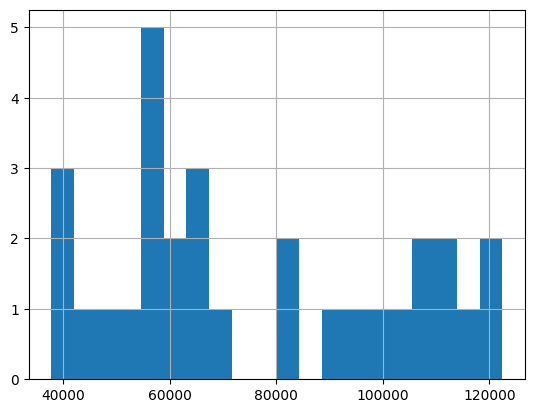

In [141]:
data.Salary.hist(bins=20)
data.Salary.describe()

The distribution appears to be multi-modal. Many observations made appears to be at earlier years of a career, bringing skewing the data to the left. Any parametric statistical methodologies will be affected.

count    30.000000
mean      5.413333
std       2.837888
min       1.200000
25%       3.300000
50%       4.800000
75%       7.800000
max      10.600000
Name: YearsExperience, dtype: float64

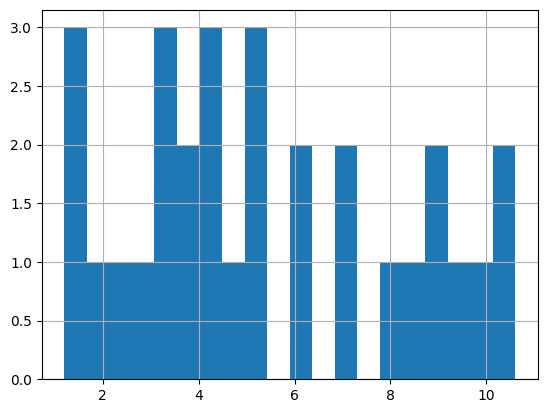

In [142]:
data.YearsExperience.hist(bins=20)
data.YearsExperience.describe()

Text(0, 0.5, 'Salary')

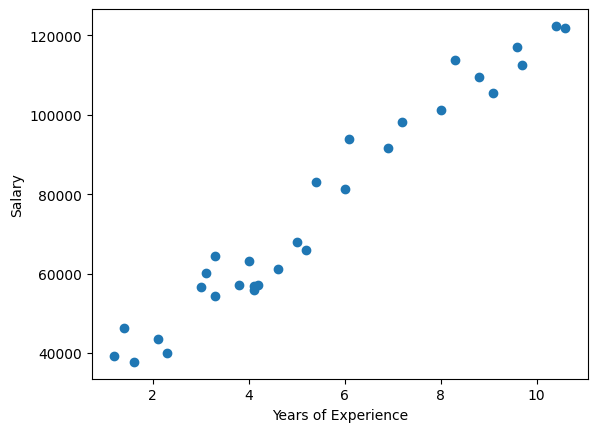

In [143]:
Xs = data.YearsExperience.values.reshape(-1, 1) 
ys = data.Salary.values.reshape(-1, 1)  
plt.scatter(Xs, ys)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

We are assuming these 30 observations represents a sample of population. We have only 30 observations, consequently, it may not be statistical significant.  But it illustrates well the process of model fitting.

In [149]:
  
model = LinearRegression().fit(Xs, ys)  
print("Intercept : ", model.intercept_)
print("Coeficient : ", model.coef_)
print(model.coef_ , " x + ", model.intercept_ )

Intercept :  [24848.20396652]
Coeficient :  [[9449.96232146]]
[[9449.96232146]]  x +  [24848.20396652]


Text(0, 0.5, 'Salary')

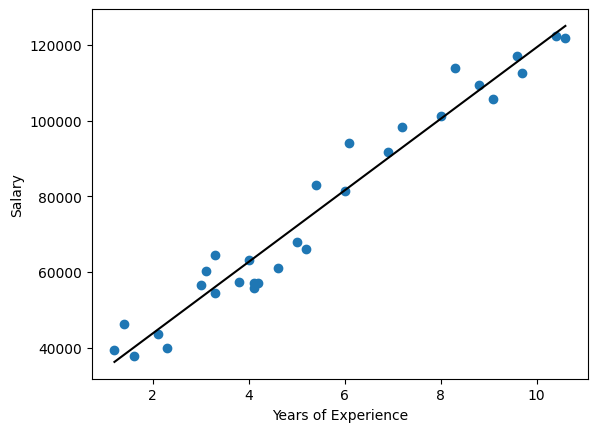

In [151]:
Xs     = data.YearsExperience.values.reshape(-1, 1) 
ys     = data.Salary.values.reshape(-1, 1)  
Y_pred = model.predict(Xs) 
plt.scatter(Xs, ys)
plt.plot(Xs, Y_pred, color = 'black')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

We use the [mean absolute average error](https://stephenallwright.com/interpret-mape/) to evaluate the model. The model appears to be quite accurate. The error is less than 10% and, consequently, the accuracy is 90% or greater.

In [153]:
mape_sum = sum(abs(ys - Y_pred)/ys)
mape = (1/len(Xs)) * mape_sum
mape


array([0.07047916])

# Some additional observations 

Some new observations are made and the model is applied to check the accuracy. We add more observations to our samples, using a covariance matrix. [Covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix)

In [154]:
years = data.YearsExperience
salary = data.Salary

sample = np.array([years, salary])

cov_matrix = np.cov(sample, bias=True)
print(cov_matrix)


[[7.78515556e+00 7.35694267e+04]
 [7.35694267e+04 7.26499262e+08]]


In [156]:
mean = [np.mean(years), np.mean(salary)]
new_obs = abs(np.random.multivariate_normal(mean, cov_matrix, size=100))
new_data = pd.DataFrame({'YearsExperience': new_obs[:, 0], 'Salary':  new_obs[:, 1]})
new_data.shape

(100, 2)

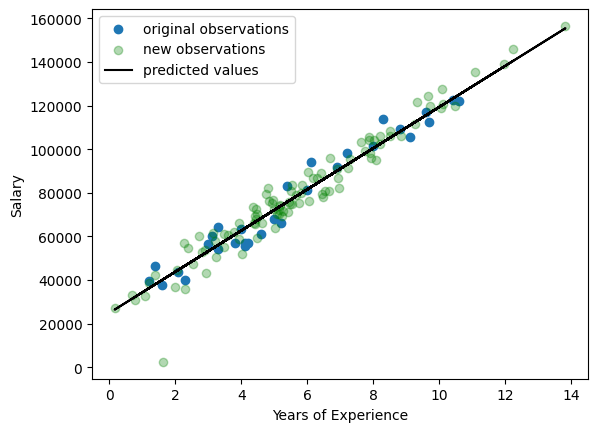

In [158]:
Xs = data.YearsExperience.values.reshape(-1,1)
ys = data.Salary.values.reshape(-1,1)
new_Xs = new_data.YearsExperience.values.reshape(-1,1)
new_ys = new_data.Salary.values.reshape(-1,1)
new_Y_pred = model.predict(new_Xs) 
plt.scatter(Xs, ys, label="original observations" )
plt.scatter(new_data.YearsExperience, new_data.Salary, alpha = 0.3,  color = "green", label="new observations")
plt.plot(new_Xs, new_Y_pred, color = "black", label= "predicted values")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()

The model may not fit well to the additional observations. More than 20% predictions were incorrect, lowering the accuracy below 80%.

In [159]:
new_Xs = new_data.YearsExperience.values.reshape(-1,1)
new_ys = new_data.Salary.values.reshape(-1,1)
new_Y_pred = model.predict(new_Xs) 
mape_sum = sum(abs(new_ys - new_Y_pred)/new_ys)
mape = (1/new_data.shape[0]) * mape_sum
mape

array([0.21114622])

# Latest obersvations
We apply our model to some new salary data. We simulate them by generated it more randomly.

In [160]:
number      = random.randrange(10000,30000)
rng         = np.random.default_rng(number)
years       = rng.integers(low=1, high=20, size=200)
salary      = rng.integers(low = 37712.4, high= 150000, size = 200)
latest_data = pd.DataFrame({"YearsExperience": years, "Salary": salary})
print(latest_data.shape)

(200, 2)


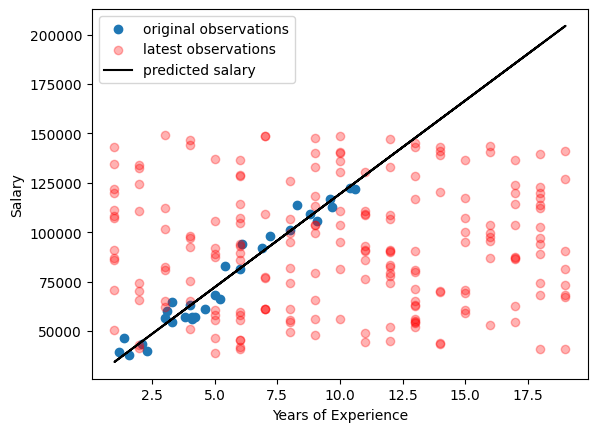

In [161]:
Xs = data.YearsExperience.values.reshape(-1,1)
ys = data.Salary.values.reshape(-1,1)
latest_Xs = latest_data.YearsExperience.values.reshape(-1,1)
latest_ys = latest_data.Salary.values.reshape(-1,1)
latest_Y_pred = model.predict(latest_Xs) 
plt.scatter(Xs, ys, label="original observations" )
plt.scatter(latest_data.YearsExperience, latest_data.Salary, alpha = 0.3, color = "red", label="latest observations")
plt.plot(latest_Xs, latest_Y_pred, color = "black", label= "predicted salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()

The latest observations suggest the model may not fit well to the new data. The proportion of mis-predicted salary rises to above 60% and lowering the accuracy below 40%.

In [162]:
latest_Xs = latest_data.YearsExperience.values.reshape(-1,1)
latest_ys = latest_data.Salary.values.reshape(-1,1)
latest_Y_pred = model.predict(latest_Xs) 
mape_sum = sum(abs(latest_ys - latest_Y_pred)/latest_ys)
mape = (1/latest_data.shape[0]) * mape_sum
mape

array([0.68805733])

# Comparison of distritbutions


## Years

### Original observations

<Axes: >

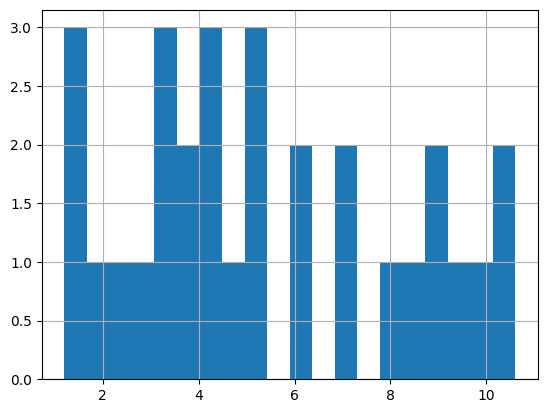

In [165]:
data.YearsExperience.hist(bins = 20)

### Some new observations

<Axes: >

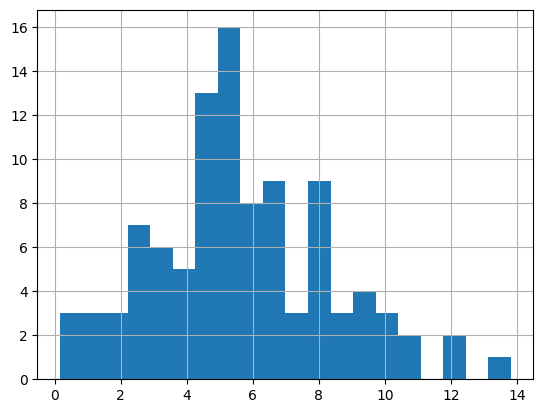

In [166]:
new_data.YearsExperience.hist(bins = 20)

### Latest observation

<Axes: >

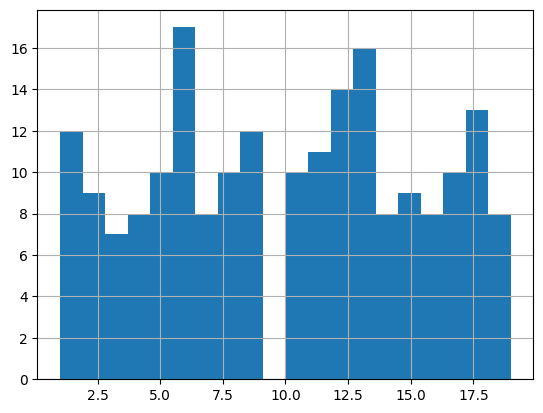

In [167]:
latest_data.YearsExperience.hist(bins = 20)

## Salary
### Original oberservations

<Axes: >

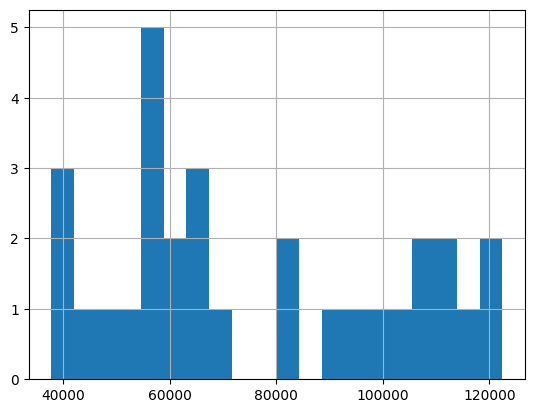

In [168]:
data.Salary.hist(bins =20)

### Some additional observations 

<Axes: >

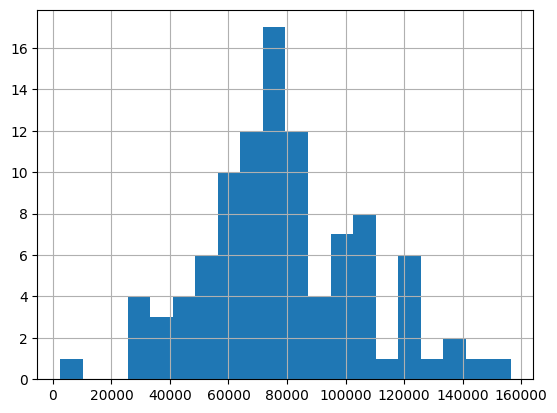

In [169]:
new_data.Salary.hist(bins = 20)

### Latest observations

<Axes: >

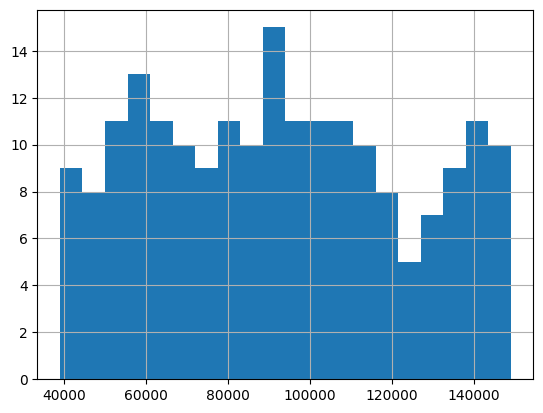

In [170]:
latest_data.Salary.hist(bins = 20)